# Import

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
import keras.applications.mobilenet_v2 as mobilenetv2

mobilenetv2_layer = mobilenetv2.MobileNetV2(include_top = False,
                                            input_shape = (224, 224, 3),
                                            weights = 'imagenet')

# We don't want to train the imported weights
mobilenetv2_layer.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
model = tf.keras.models.load_model('model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trai

# Predicting

In [ ]:
from google.colab import files
import cv2

In [ ]:
labels = {0: 'organic', 1: 'cardboard', 2: 'glass', 3: 'metal', 4: 'paper', 5: 'plastic'}
print(labels)

{0: 'organic', 1: 'cardboard', 2: 'glass', 3: 'metal', 4: 'paper', 5: 'plastic'}


In [ ]:
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,[1,224,224,3])
    return img

In [ ]:
def predict_image(model, image_path):
    img = load_image(image_path)
    preds = model.predict(img)
    preds = preds.argmax(1)
    preds = [labels[item] for item in preds]
    plt.imshow(img[0])
    plt.show()
    print(preds)

# Predict using uploaded image

In [ ]:
# Upload your image here
image_path = files.upload()
for y in image_path.keys():
  path = y
predict_image(model, path)

Saving daqdw.webp to daqdw.webp


# Predict using saved images on your Drive

In [1]:
# predict_image(model, 'path_to_your_drive')

1/1 [==============================] - 1s 1s/step


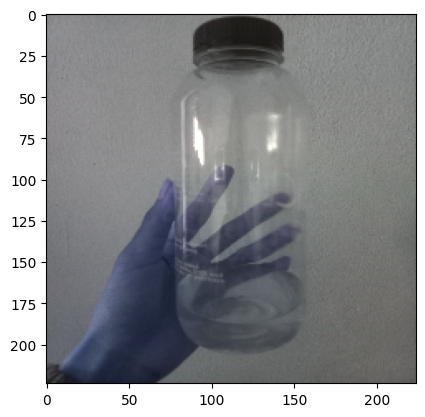

['plastic']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143152.jpg')

1/1 [==============================] - 0s 134ms/step


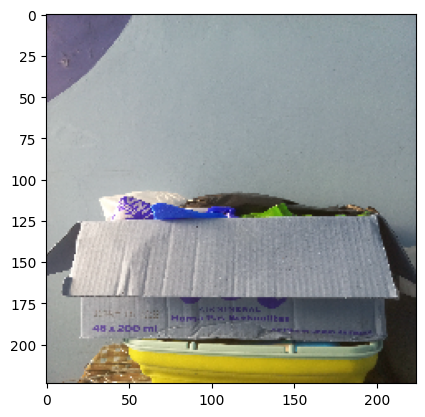

['cardboard']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143238.jpg')

1/1 [==============================] - 0s 114ms/step


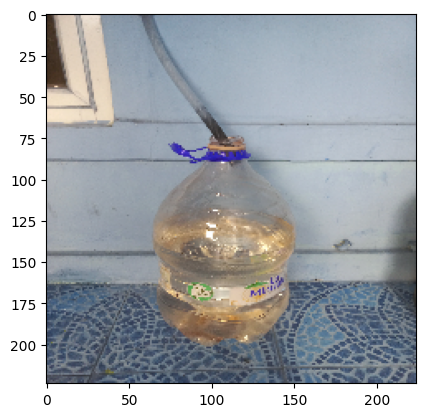

['plastic']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143246.jpg')

1/1 [==============================] - 0s 110ms/step


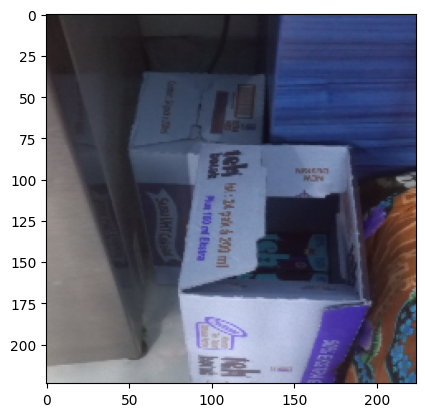

['paper']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143314.jpg')

1/1 [==============================] - 0s 80ms/step


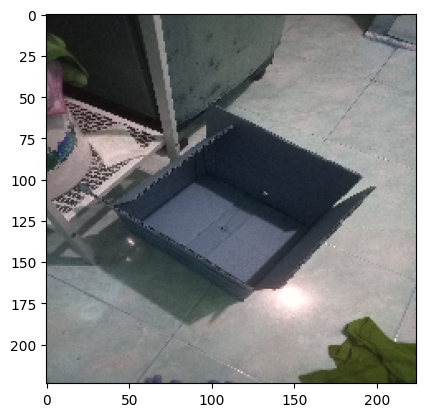

['cardboard']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143332.jpg')

1/1 [==============================] - 0s 81ms/step


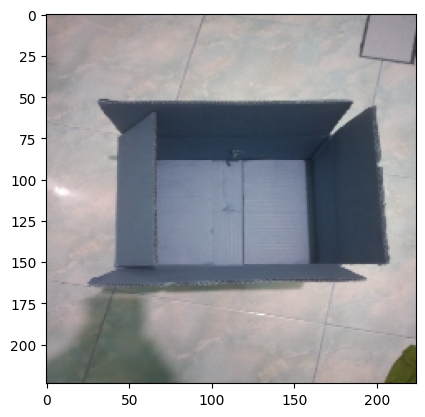

['cardboard']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143344.jpg')

1/1 [==============================] - 0s 73ms/step


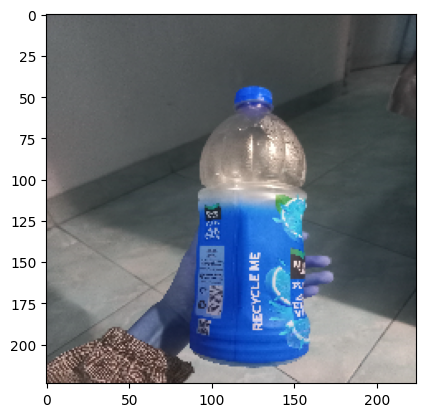

['plastic']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143414.jpg')

1/1 [==============================] - 0s 75ms/step


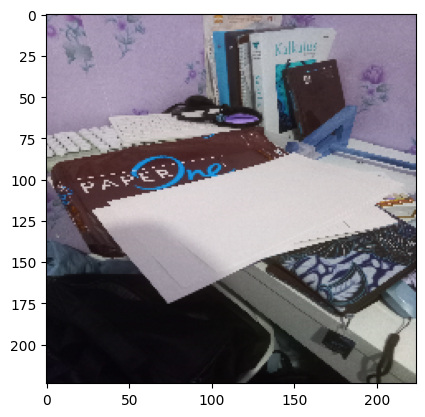

['paper']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143448.jpg')

1/1 [==============================] - 0s 85ms/step


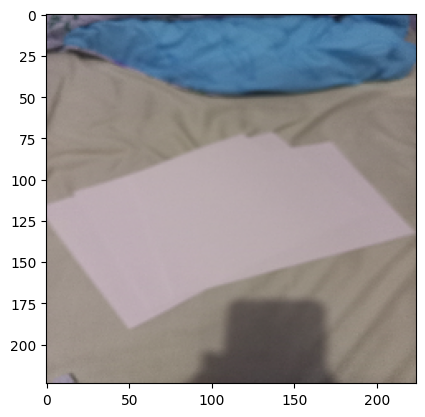

['paper']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143456.jpg')

1/1 [==============================] - 0s 87ms/step


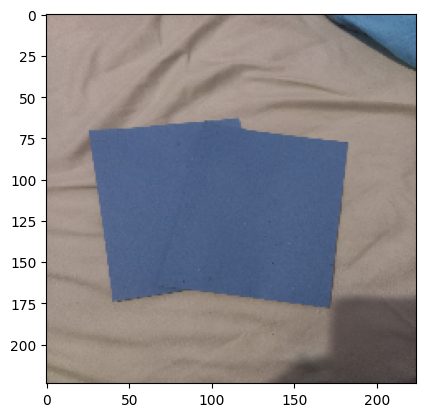

['paper']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_143513.jpg')

1/1 [==============================] - 0s 83ms/step


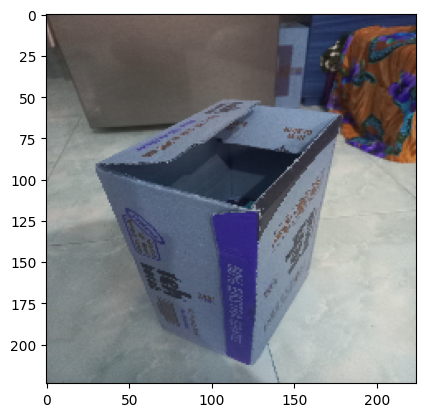

['cardboard']


In [ ]:
predict_image(model, '/content/drive/MyDrive/capstone/foto realtime/20230607_150110.jpg')